In [ ]:
pip install factor_analyzer

In [11]:
df = pd.read_csv("/Users/spandanapatil/Desktop/FactorAnalysis/CC GENERAL.csv")

In [12]:
df.shape

(8950, 18)

In [13]:
df.head()

,CUST_ID,BALANCE,BALANCE_FREQUENCY,PURCHASES,ONEOFF_PURCHASES,INSTALLMENTS_PURCHASES,CASH_ADVANCE,PURCHASES_FREQUENCY,ONEOFF_PURCHASES_FREQUENCY,PURCHASES_INSTALLMENTS_FREQUENCY,CASH_ADVANCE_FREQUENCY,CASH_ADVANCE_TRX,PURCHASES_TRX,CREDIT_LIMIT,PAYMENTS,MINIMUM_PAYMENTS,PRC_FULL_PAYMENT,TENURE
0,C10001,40.900749,0.818182,95.40,0.00,95.4,0.000000,0.166667,0.000000,0.083333,0.000000,0,2,1000.0,201.802084,139.509787,0.000000,12
1,C10002,3202.467416,0.909091,0.00,0.00,0.0,6442.945483,0.000000,0.000000,0.000000,0.250000,4,0,7000.0,4103.032597,1072.340217,0.222222,12
2,C10003,2495.148862,1.000000,773.17,773.17,0.0,0.000000,1.000000,1.000000,0.000000,0.000000,0,12,7500.0,622.066742,627.284787,0.000000,12
3,C10004,1666.670542,0.636364,1499.00,1499.00,0.0,205.788017,0.083333,0.083333,0.000000,0.083333,1,1,7500.0,0.000000,NaN,0.000000,12
4,C10005,817.714335,1.000000,16.00,16.00,0.0,0.000000,0.083333,0.083333,0.000000,0.000000,0,1,1200.0,678.334763,244.791237,0.000000,12


In [14]:
df.drop([ 'CUST_ID'], axis=1, inplace=True)

In [15]:
df.dropna(inplace=True)

In [16]:
kmo_all,kmo_model=calculate_kmo(df)

In [17]:
kmo_model

0.640893239542142

In [18]:
df.shape

(8636, 17)

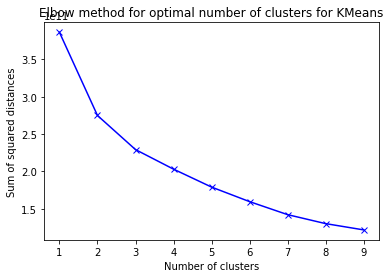

In [24]:

from sklearn.cluster import KMeans
distortions = []
K = range(1, 10)
for k in range(1, 10):
    kmeans = KMeans(n_clusters=k)
    kmeans.fit(df)
    distortions.append(kmeans.inertia_)

plt.plot(K, distortions, 'bx-')
plt.xlabel('Number of clusters')
plt.ylabel('Sum of squared distances')
plt.title('Elbow method for optimal number of clusters for KMeans')
plt.show()